In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Industry_10=pd.read_excel('Industry_Portfolios.xlsx',index_col=0,parse_dates=True)
Industry_10=Industry_10.applymap(lambda x: x*0.01)
Risk_factor=pd.read_excel('Risk_Factors.xlsx',index_col=0,parse_dates=True)
Risk_factor=Risk_factor.applymap(lambda x: x*0.01)
Market=pd.read_excel('Market_Portfolio.xlsx',index_col=0,parse_dates=True)
Market=Market.applymap(lambda x: x*0.01)

In [3]:
#Combine 2 dataframes
df=pd.concat([Industry_10,Risk_factor],axis=1)

In [4]:
df.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Rf,Rm-Rf,SMB,HML
Date,,,,,,,,,,,,,,
200401,0.0006,-0.0107,-0.0062,0.0044,0.0453,0.0141,0.0045,0.0309,0.0192,0.0288,0.0007,0.0215,0.0267,0.0155
200402,0.0425,-0.0007,0.0195,0.0469,-0.0292,-0.0052,0.0609,0.0089,0.0207,0.0216,0.0006,0.0140,-0.0117,0.0045
200403,-0.0009,-0.0115,-0.0027,-0.0013,-0.0255,-0.0207,0.0029,-0.0396,0.0113,-0.0063,0.0009,-0.0132,0.0184,0.0007
200404,0.0142,0.0230,-0.0017,0.0252,-0.0491,-0.0048,-0.0270,0.0354,-0.0355,-0.0376,0.0008,-0.0183,-0.0259,-0.0167
200405,-0.0189,-0.0164,0.0161,0.0039,0.0485,-0.0295,0.0030,-0.0042,0.0128,0.0186,0.0006,0.0117,-0.0010,-0.0033


In [5]:
#Create DataFrame for each asset excess return (Ri-Rf)
excess_dict={}
for a in Industry_10.columns:
    ret_excess=df[a]-df.Rf
    excess_dict[a]=ret_excess
df_ExcessRet=pd.DataFrame(excess_dict)

In [6]:
#Part 1
#Sharpe Ratio
SR=df_ExcessRet.mean()/df_ExcessRet.std()
SR

NoDur    0.231099
Durbl    0.072356
Manuf    0.166616
Enrgy    0.181708
HiTec    0.118552
Telcm    0.169064
Shops    0.191753
Hlth     0.172529
Utils    0.210948
Other    0.064693
dtype: float64

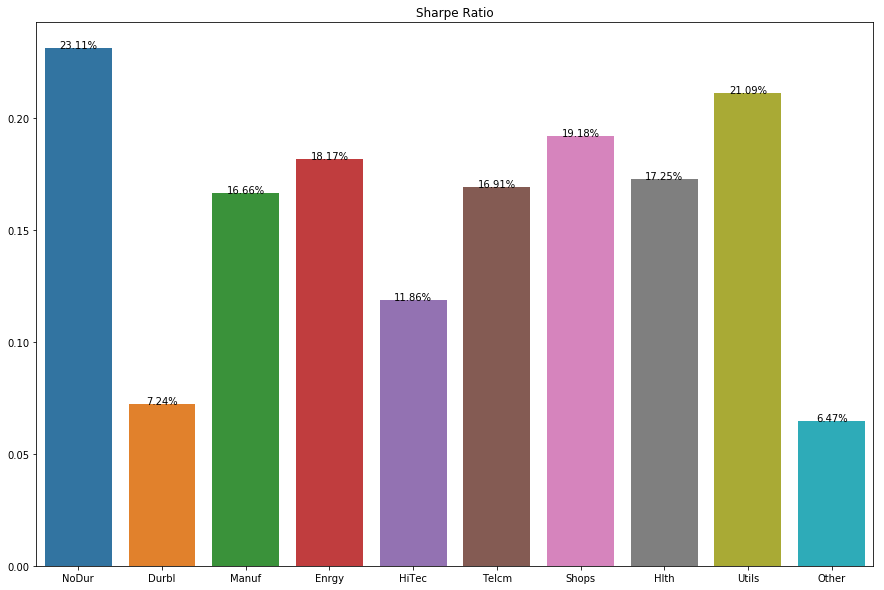

In [7]:
plt.figure(figsize=(15,10))
ax=sns.barplot(SR.index,SR)
idx = np.arange(len(SR))
for i,v in zip(idx,SR):
    ax.text(i,v,'{:.02%}'.format(v),ha='center')
plt.title('Sharpe Ratio')
plt.savefig('SR')    
plt.show()

In [8]:
#Sortino ratio
dd=df_ExcessRet[df_ExcessRet<0]**2
dp=dd.mean()
np.sqrt(dp)
Sortino_ratio=df_ExcessRet.mean()/np.sqrt(dp)
Sortino_ratio

NoDur    0.212422
Durbl    0.074411
Manuf    0.144420
Enrgy    0.167552
HiTec    0.111231
Telcm    0.151652
Shops    0.179444
Hlth     0.176210
Utils    0.156641
Other    0.055246
dtype: float64

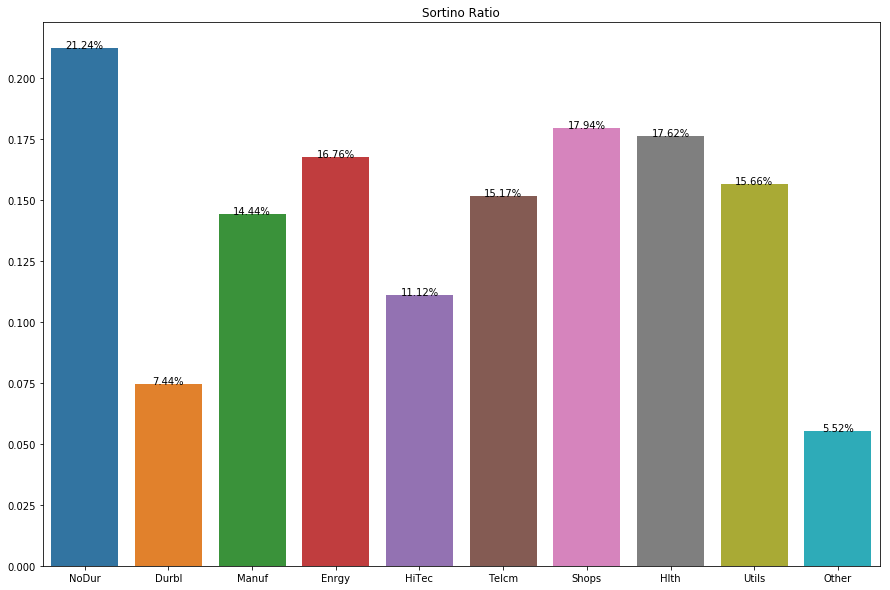

In [9]:
plt.figure(figsize=(15,10))
plt.title('Sortino Ratio')
ax=sns.barplot(Sortino_ratio.index,Sortino_ratio)
idx = np.arange(len(Sortino_ratio))
for i,v in zip(idx,Sortino_ratio):
    ax.text(i,v,'{:.02%}'.format(v),ha='center')
plt.savefig('Sortino') 
plt.show()

In [10]:
df_ExcessRet['Market Excess']=Market.Market-df.Rf
df_ExcessRet.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market Excess
Date,,,,,,,,,,,
200401,-0.0001,-0.0114,-0.0069,0.0037,0.0446,0.0134,0.0038,0.0302,0.0185,0.0281,0.0215
200402,0.0419,-0.0013,0.0189,0.0463,-0.0298,-0.0058,0.0603,0.0083,0.0201,0.0210,0.0140
200403,-0.0018,-0.0124,-0.0036,-0.0022,-0.0264,-0.0216,0.0020,-0.0405,0.0104,-0.0072,-0.0132
200404,0.0134,0.0222,-0.0025,0.0244,-0.0499,-0.0056,-0.0278,0.0346,-0.0363,-0.0384,-0.0183
200405,-0.0195,-0.0170,0.0155,0.0033,0.0479,-0.0301,0.0024,-0.0048,0.0122,0.0180,0.0117


In [11]:
#Jensen's alpha

lm=LinearRegression()
beta=[]
x=np.array(df_ExcessRet['Market Excess']).reshape(-1,1)
for i in df_ExcessRet:
    y=np.array(df_ExcessRet[i]).reshape(-1,1)
    lm.fit(x,y)
    beta.append(lm.coef_)
beta=[float(j) for j in beta] #remove the list bracket

In [12]:

Beta_frame=pd.DataFrame({'Beta':beta},index=df_ExcessRet.columns)
print('Beta for Each Industry asset is shown below:')
Beta_frame

Beta for Each Industry asset is shown below:


,Beta
NoDur,0.653744
Durbl,1.649374
Manuf,1.167929
Enrgy,0.965527
HiTec,1.132387
Telcm,0.901721
Shops,0.829515
Hlth,0.675890
Utils,0.537009
Other,1.206992


In [13]:
alpha=np.array(df_ExcessRet.mean()).reshape(len(df_ExcessRet.columns),1)-np.array(Beta_frame)*(df_ExcessRet['Market Excess'].mean())
alpha=pd.DataFrame(alpha,index=df_ExcessRet.columns,columns=["Jensen's alpha"])
alpha

,Jensen's alpha
NoDur,3.697175e-03
Durbl,-4.179031e-03
Manuf,1.604943e-03
Enrgy,5.044852e-03
HiTec,-6.402359e-04
Telcm,1.943480e-03
Shops,2.740926e-03
Hlth,2.369681e-03
Utils,4.465234e-03
Other,-3.875078e-03


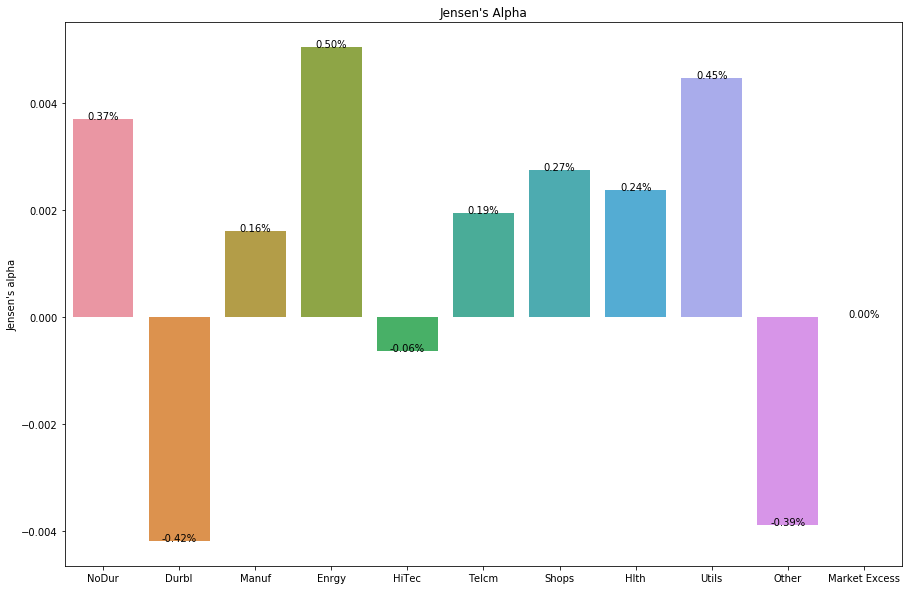

In [14]:
plt.figure(figsize=(15,10))
ax=sns.barplot(alpha.index,alpha['Jensen\'s alpha'])
idx = np.arange(len(alpha))
for i,v in zip(idx,alpha['Jensen\'s alpha']):
    ax.text(i,v,'{:.02%}'.format(v),ha='center')
plt.title("Jensen's Alpha")
plt.savefig('Jensen')
plt.show()

In [15]:
#Three-factor alpha
LM=LinearRegression()
Three_factor=[]
for i in df_ExcessRet:
    LM.fit(df[['Rm-Rf','SMB','HML']],df_ExcessRet[i])
    Three_factor.append(LM.intercept_)
Three_factor_alpha=pd.DataFrame(Three_factor,index=df_ExcessRet.columns,columns=['Alpha'])
Three_factor_alpha

,Alpha
NoDur,3.867045e-03
Durbl,-4.743418e-03
Manuf,1.532846e-03
Enrgy,5.230070e-03
HiTec,-6.597942e-04
Telcm,2.007240e-03
Shops,2.559411e-03
Hlth,2.574723e-03
Utils,4.744106e-03
Other,-4.044115e-03


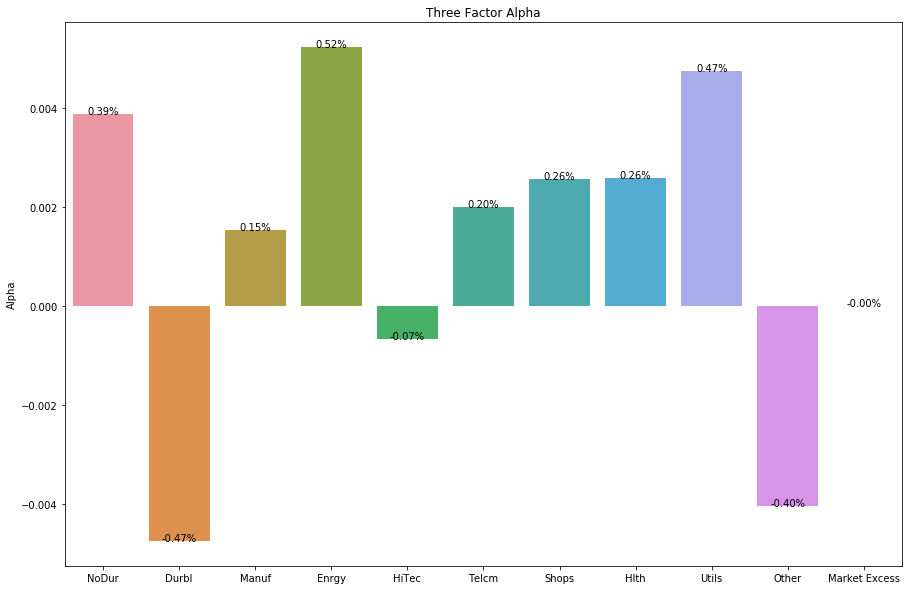

In [16]:
plt.figure(figsize=(15,10))
ax=sns.barplot(Three_factor_alpha.index,Three_factor_alpha['Alpha'])
idx = np.arange(len(Three_factor_alpha))
for i,v in zip(idx,Three_factor_alpha['Alpha']):
    ax.text(i,v,'{:.02%}'.format(v),ha='center')
plt.title('Three Factor Alpha')
plt.savefig('Three factor alpha')
plt.show()

In [17]:
#Part 2

Ones=np.ones(len(Industry_10.columns))
alpha=np.dot(np.dot(Industry_10.mean().T,np.linalg.inv(Industry_10.cov())),Ones) #calculate alpha
zeta=np.dot(np.dot(Industry_10.mean().T,np.linalg.inv(Industry_10.cov())),Industry_10.mean()) #calculate zeta
delta=np.dot(np.dot(Ones.T,np.linalg.inv(Industry_10.cov())),Ones) #calculate delta

In [18]:
# Create large range of weights
portfolio_vol=[]
portfolio_ret=[]
sr=[]
for n in range(100000):
    w=np.random.uniform(-2,2,len(Industry_10.columns))
    w /=sum(w)
    Port_Vol=np.sqrt(np.dot(np.dot(w,Industry_10.cov()),w.T))
    Port_Ret=np.dot(w,Industry_10.mean())
    sharpe=Port_Ret/Port_Vol
    portfolio_vol.append(Port_Vol)
    portfolio_ret.append(Port_Ret)
    sr.append(sharpe)
p_vol=np.array(portfolio_vol)
p_ret=np.array(portfolio_ret)
sr=np.array(sr)



In [19]:
result=pd.DataFrame({'Expected Return':p_ret,'Volatility':p_vol,'Sharpe Ratio':sr})
result.head()

,Expected Return,Volatility,Sharpe Ratio
0,0.010728,0.045548,0.235536
1,0.005792,0.057000,0.101610
2,0.015236,0.064806,0.235104
3,0.008923,0.036431,0.244920
4,0.007948,0.039305,0.202226


In [20]:
vol=[]
for r in result['Expected Return']:
    volatility=np.sqrt(1/delta+(delta/(zeta*delta-alpha**2))*(r-alpha/delta)**2)
    vol.append(volatility)

In [21]:
# Create limited range of weights from 0 to 1
portfolio_vol_limit=[]
portfolio_ret_limit=[]
sr_limit=[]
for m in range(100000):
    w_limit=np.random.uniform(0,1,len(Industry_10.columns))
    w_limit /=sum(w_limit)
    Port_Vol_limit=np.sqrt(np.dot(np.dot(w_limit,Industry_10.cov()),w_limit.T))
    Port_Ret_limit=np.dot(w_limit,Industry_10.mean())
    sharpe_limit=Port_Ret_limit/Port_Vol_limit
    portfolio_vol_limit.append(Port_Vol_limit)
    portfolio_ret_limit.append(Port_Ret_limit)
    sr_limit.append(sharpe_limit)
    
vol_limit=[]
for r in portfolio_ret_limit:
    volatility_limit=np.sqrt(1/delta+(delta/(zeta*delta-alpha**2))*(r-alpha/delta)**2)
    vol_limit.append(volatility_limit)

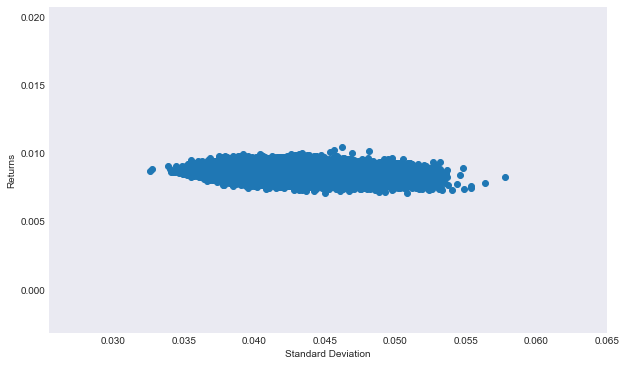

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(portfolio_vol_limit,portfolio_ret_limit)
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.show()

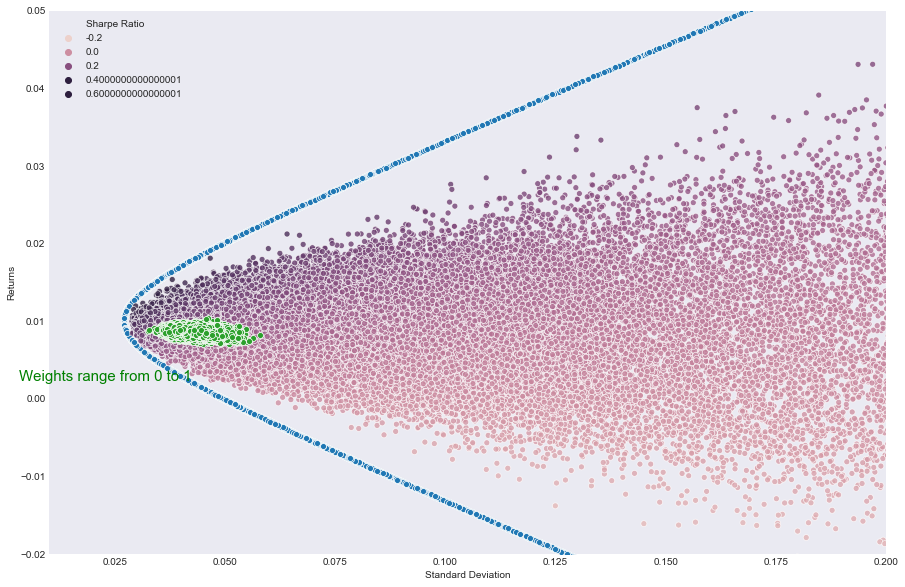

In [32]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(15,10))
ax=sns.scatterplot(vol,result['Expected Return'],palette="YlOrRd")
ax1=sns.scatterplot(result['Volatility'],result['Expected Return'],hue=result['Sharpe Ratio'],alpha=0.8)
#ax2=sns.scatterplot(vol_limit,portfolio_ret_limit,alpha=1)
plt.annotate("Weights range from 0 to 1",xy=(0.025,0.01),xycoords='data',xytext=(-10,-60),textcoords='offset points',fontsize=15
            ,ha='center',color='g')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
sns.scatterplot(portfolio_vol_limit,portfolio_ret_limit)
plt.xlim(0.01,0.2)
plt.ylim(-0.02,0.05)
plt.savefig("EF frontier")
plt.show()